# Term Project - Jupyter Notebook

ESI4628: Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula

#### According to UCF Golden rules of academic ethics and honesty, plagiarism is not acceptable under any circumstances. 

## Title: Hypothesis Examination of A Data Set

#### Team Members:Julian Cardenas Hernandez, Aundria Cohen, Nicholas Grano, Daniel Luna, and Kristin Synnott.

#### Team Number: 11

### 1 Problem Statement :

The problem that we are trying to focus on is to estimate high blood pressure depending on the regions. The estimates we are using from the data set focus on states (as opposed to counties or cities) which will allow these States and their local health centers to better understand the impact and topographical dispersion of health-related variables in their state. This will assist each of these states in planning public health interventions associated with high blood pressure.

“Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2015 were in men.” ( Heart Disease Fact Sheet, CDC). Every one in four people in the United States die every year due to a heart disease related issue. High blood pressure is one of the key factors that plays into this statistic. This is clearly a crucial health concern that we need to take actions to prevent diseases associated with this from rising. If we can analyze data to see which regions are at high risk, then we can educate the public and hopefully stop and lower risks of chronic diseases. 

### 2 Dataset :

The data set that was chosen for this project was selected from data.gov titled “500 Cities: Local Data for Better Health”. This study gathered data from almost 30 different chronic, illnesses related to unhealthy behaviors, different health outcomes, and prevalence. This dataset is exclusive compared to other datasets because it marks where within large cities these illnesses are happening. This can help city council men/women target areas within their district to help further prevent and treat these diseases. The group decided to take a subsample of this data and look at only three states, California, Florida, and Massachusetts. The team also decided to only look at one chronic disease, which is high blood pressure within these areas.

#### Filtration Code/ Notes

In [1]:
import pandas as pd


df1 = pd.read_csv('SuperFilteredData.csv') # Data File imported from excel with all filtration done beforehand
data = pd.read_csv('SuperFilteredData.csv') # Reiteration of dataset for use in future code
df2 = data.drop(['CA-latitude','CA-longitude','FL-latitude','FL-longitude','MA-latitude','MA-longitude'], axis = 1)


### 3 Modeling Type and Technique:

The summary of our modeling type is to use different styles to manipulate the data.  We first start with an ANOVA table.  This analyzes the data to determine if our data is significant or not.  The next type of modeling we use is to find the mean and standard deviation.  By finding both the mean and standard deviation and we can compare each state to one another.  The next and last part of our modeling type is we created a box plot and a scatter plot.  The box plot is another way for us to compare the different states with five different statistical measures.  The scatter plot allows us to compare two variables and how one of the variables affects the other.



One modeling technique we chose to use for this project was ANOVA. ANOVA is short for “Analysis of variance” and is a statistical method which helps determine if data is significant or not. This type of method is helpful for our project because we are comparing 3 different states (California, Florida, and Massachusetts). Another modeling technique we chose to use was to find the standard deviation and mean of the number of adults with high blood pressure aged at or above 18 years old. By doing this we were able to find out how many adults on average had high blood pressure (mean) and how spread out or close to the average the results were (standard deviation). The last modeling technique we chose was to incorporate a boxplot grouped by state. The boxplot is a way to help visualize the data and see the distribution in a more standardized way. By visualizing the data in this way, we will be able to see the median, lower and upper quartile, lowest observation, and highest observation. This data is important in visually showing us the difference in the data between the three states.

### 4 Implementation

In [2]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import random
from matplotlib import cm
import statsmodels.api as sm
from statsmodels.formula.api import ols as ols
import os
import tarfile
from six.moves import urllib
import matplotlib.image as mpimg

df1 = pd.read_csv('SuperFilteredData.csv') # Data File imported from excel with all filtration done beforehand
data = pd.read_csv('SuperFilteredData.csv') # Reiteration of dataset for use in future code
df2 = data.drop(['CA-latitude','CA-longitude','FL-latitude','FL-longitude','MA-latitude','MA-longitude'], axis = 1)

In [3]:
df2.groupby('State').mean() #Mean of our data values grouped by state

,Data_Value,PopulationCount
State,,
California,26.870608,12242.329684
Florida,32.176267,11387.797208
Massachusetts,28.443725,10946.956863


In [4]:
df2.groupby('State').std() #Standard Deviation for our data grouped by state

,Data_Value,PopulationCount
State,,
California,4.987031,85790.608696
Florida,7.796611,45059.926885
Massachusetts,7.122702,44093.658540


In [5]:
df2.sort_values(by='Data_Value', ascending=False, inplace=True) #top five worst locations, Sorted
df2.head()

,StateAbbr,State,CityName,Measure,DataValueTypeID,Data_Value,PopulationCount
7257,FL,Florida,Tampa,High blood pressure among adults aged >=18 Years,CrdPrv,68.3,140
3477,CA,California,Redlands,High blood pressure among adults aged >=18 Years,CrdPrv,60.0,56
6976,FL,Florida,Pembroke Pines,High blood pressure among adults aged >=18 Years,CrdPrv,58.5,7569
2727,CA,California,Menifee,High blood pressure among adults aged >=18 Years,CrdPrv,57.7,2142
5342,CA,California,Victorville,High blood pressure among adults aged >=18 Years,CrdPrv,57.5,217


In [6]:
mod = ols('Data_Value ~ State', data=data).fit()  # Simple anova table based on our data, showing only the the F test statistic, and Probability value for States
aov_table= sm.stats.anova_lm(mod, typ=2) # Python's Anova version
print (aov_table) # Simplified Anova table Results

                 sum_sq      df           F         PR(>F)
State      30818.402998     2.0  462.621478  5.796565e-190
Residual  244783.753237  7349.0         NaN            NaN


In [7]:
results = ols('Data_Value ~ State', data=data).fit() # Expanded Anova Table detailing more information, and conducting more statistical tests from the same data set
results.summary() # Actual Anova Table Results shown

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Value   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     462.6
Date:                Sun, 09 Dec 2018   Prob (F-statistic):          5.80e-190
Time:                        14:02:18   Log-Likelihood:                -23318.
No. Observations:                7352   AIC:                         4.664e+04
Df Residuals:                    7349   BIC:                         4.666e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 26.8706      0.078    344.691      0.000      26.718      27.023
State[T.Florida]           5.3057      0.175     30.355      0.000       4.963       5.648
State[T.Massachusetts]     1.5731      0.267      5.888      0.000       1.049       2.097
==============================================================================
Omnibus:                      715.312   Durbin-Watson:                   1.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.771
Skew:                           0.394   Prob(JB):                         0.00
Kurtosis:                       6.093   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5 Visualization :

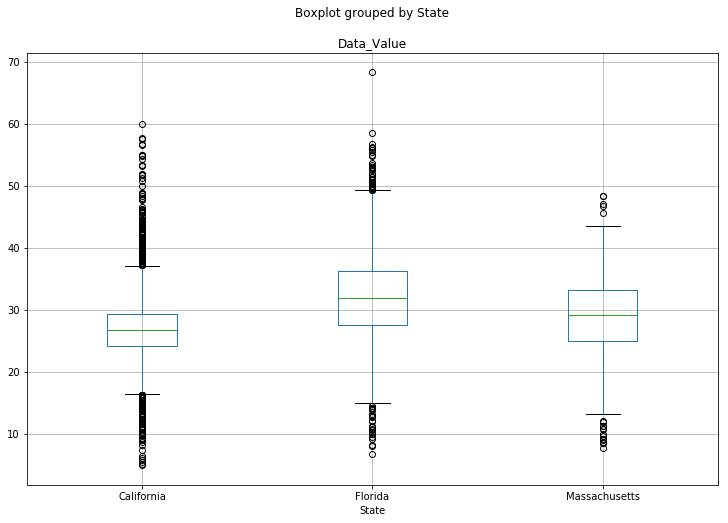

In [8]:
data = pd.read_csv('SuperFilteredData.csv') # Boxplot used to display the shape of distribution, mean and variability among states
data.boxplot('Data_Value', by='State', figsize=(12,8)) # Allows for visual representation on of variation among data points, and showing any outliers among the dataset

### Note: In order for the visualization below  to run correctly, download and save the images "California.png" "floridatest.jpg" "massachusetts.jpg" from our submission file

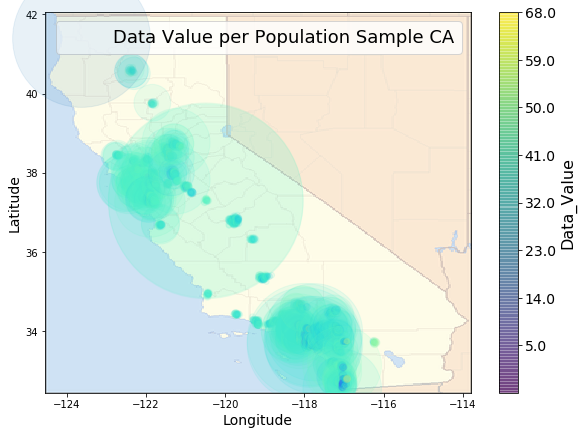

In [9]:
import matplotlib.image as mpimg #imports image 
Calmap = pd.read_csv('SuperFilteredData.csv') #reads csv file
cal_img=mpimg.imread('California.png') # reads image from saved location
ax = Calmap.plot(kind="scatter", x="CA-longitude", y="CA-latitude", figsize=(10,7), #plots 
                       s=Calmap['PopulationCount']/100, label="Data Value per Population Sample CA", #reduces the population to fix map
                       c="Data_Value", cmap=plt.get_cmap("rainbow"), #color map for the image
                       colorbar=False, alpha=0.1, #intensity of the chart
                      )
plt.imshow(cal_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5) #fits image to data
plt.ylabel("Latitude", fontsize=14) # label for the y axis
plt.xlabel("Longitude", fontsize=14) #label for the x axis

Prev = Calmap["Data_Value"] #data value displays onto map
intrvl = np.linspace(Prev.min(), Prev.max(), 8) #linespace for min,max, and spacing on scale
colorbar = plt.colorbar() #plots the color in the scale

colorbar.set_label('Data_Value', fontsize=16) #label for scale
colorbar.ax.set_yticklabels([(round(v)) for v in intrvl], fontsize=14) #takes data value and rounds to whole number for display
plt.legend(fontsize=18) #legend font size
plt.show() #displays the plot

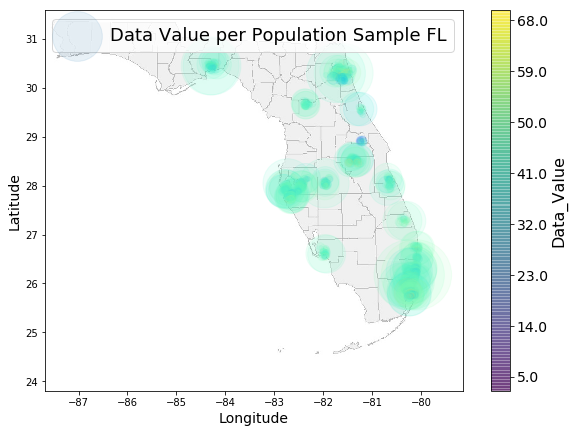

In [11]:
import matplotlib.image as mpimg #imports image
flmap= pd.read_csv('SuperFilteredData.csv') #reads csv file
us_img=mpimg.imread('floridatest.jpg') # reads image from saved location
ax = flmap.plot(kind="scatter", x="FL-longitude", y="FL-latitude", figsize=(10,7), #plots
                       s=Calmap['PopulationCount']/100, label="Data Value per Population Sample FL", #reduces the population to fix map
                       c="Data_Value", cmap=plt.get_cmap("rainbow"), #color map for the image
                       colorbar=False, alpha=0.1, #intensity of the chart
                      )
plt.imshow(us_img, extent=[-87.68620828,-79.150711631, 23.80728257, 31.58258338], alpha=0.5) #fits image to data
plt.ylabel("Latitude", fontsize=14) # label for the y axis
plt.xlabel("Longitude", fontsize=14) #label for the x axis

Prev = flmap["Data_Value"] #data value displays onto map
tick_values = np.linspace(Prev.min(), Prev.max(), 8) #linespace for min,max, and spacing on scale
colorbar = plt.colorbar() #plots the color in the scale
colorbar.ax.set_yticklabels([(round(v)) for v in tick_values], fontsize=14) #label for scale
colorbar.set_label('Data_Value', fontsize=16) #takes data value and rounds to whole number for display

plt.legend(fontsize=18) #legend font size
plt.show() #displays the plot

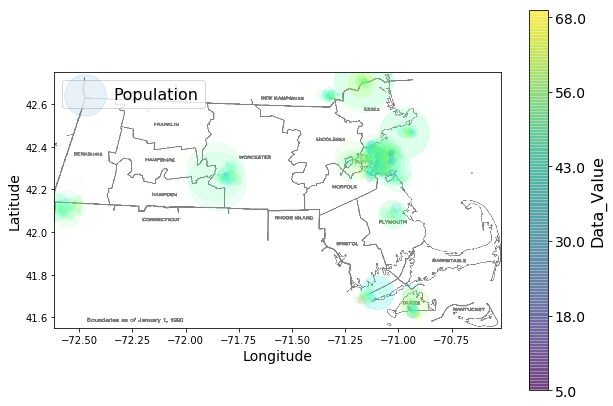

In [12]:
import matplotlib.image as mpimg #imports image
massmap= pd.read_csv('SuperFilteredData.csv') #reads csv file
us_img=mpimg.imread('massachusetts.jpg') # reads image from saved location
ax = massmap.plot(kind="scatter", x="MA-longitude", y="MA-latitude", figsize=(10,7), #plots
                       s=massmap['PopulationCount']/100, label="Population", #reduces the population to fix map
                       c="Data_Value", cmap=plt.get_cmap("jet"), #color map for the image
                       colorbar=False, alpha=0.1, #intensity of the chart
                      )
plt.imshow(us_img, extent=[-72.61567902,-70.51915548, 41.55068993, 42.75009253], alpha=0.5) #fits image to data
plt.ylabel("Latitude", fontsize=14) # label for the y axis
plt.xlabel("Longitude", fontsize=14) #label for the x axis

Prev = massmap["Data_Value"] #data value displays onto map
tick_values = np.linspace(Prev.min(), Prev.max(), 6) #linespace for min,max, and spacing on scale
cbar = plt.colorbar() #plots the color in the scale
cbar.ax.set_yticklabels([(round(v)) for v in tick_values], fontsize=14) #label for scale
cbar.set_label('Data_Value', fontsize=16) #takes data value and rounds to whole number for display

plt.legend(fontsize=16) #legend font size
plt.show() #displays the plot

### 6 Observations:

Our results and observations for our project include comparing the number of adults with high blood pressure aged at or above 18 years old.  In our project we incorporate the use of ANOVA, we found the standard deviation and mean of the number of adults with high blood pressure, and lastly, we found supported our evidence with visuals including a box plot, a scatter plot, and a map.  By using all the modeling types and techniques previously mentioned, we were able to better understand the data and visually see what the data was showing us.  The results of the model show California having an average of 26.87% of crude prevalence with a standard deviation of almost 5%, Massachusetts having an average of 28.44% of crude prevalence with a standard deviation of 7.12% and Florida having an average of 32.17% of crude prevalence with a standard deviation of 7.8%.  From first glance, there is evidence that California is the healthiest state out of the three selected states when it comes to high-pressure crude prevalence.  It can also be seen from first glance that Florida is the unhealthiest state with an average of crude prevalence being just over 5% more than that of California.  Florida also has the highest standard deviation of 7.8%, which is almost 3% higher than that of California as well.  California has the lowest average of crude prevalence percentage and the smallest variance out of the three states in study.  Massachusetts is right between the two states of California and Florida with a crude prevalence closer to that of California but a standard deviation closer to Florida.  To better understand our data, we first used an ANOVA which is stands for “Analysis of variance”.  The ANOVA is a statistical method which helps determine if data is significant or not.  This type of method was helpful because we are comparing the three different states of California, Massachusetts, and Florida.  The ANOVA results has a very low P value and a low R squared, which indicates that the data is high variability but also has a significant trend.  This indicates that the variable provides information about the response even though data points are spread far from the regression line.  The results of the model demonstrate that the model is not adequate to build predictions with precision.  A box plot, also known as a box and whisker diagram, is a good way to visualize this data and compare the results between state to state.  The box plot will display a five number summary, which is: the minimum, first quartile, median, third quartile and maximum.  The box plot helps visualize these results since it has small boxes and many outliers.  This helps us justify our results and observations of our project because by just looking at our data this information would not clearly be visible to us like it is in a box plot.  The small boxes indicate that a high kurtosis is present and the position of the boxes closer to the lower side demonstrates a slight level of skewness.

### 7 Project Report:

Our research is based on the possible effect that living in a different state will have on your health, more specifically in this case; high blood pressure. As a team it was agreed that our hypothesis is that different states do not have an effect on a person’s high blood pressure.  Testing this against the alternative hypothesis that living in a different state does affect one’s high blood pressure. To best conduct this research and prove our hypothesis, the Anova statistical method was used at it will produce the clearest results. The dataset being used is quite large, and to possibly reduce the error involved, it was narrowed down to the study of health issues in three states. The states were chosen on major states across the country, and unbiased decisions were made to best represent the country for this study. Based on the Anova study conducted on python the above table was generated, and it can be read as such. The first value to look at is your p-value, which in this case is 0.000, now compare that to our alpha of 0.05, which is the industry standard unless otherwise stated, the results yield that since the p-value is less than alpha, we can reject the null hypothesis, and thus prove that different states do have an effect on the health issue regarding high blood pressure. The R-squared value, or the coefficient of determination is what explains the variance of the study, and for our research this value was quite low at 11.2%. Normally, any value under 90% is not good, but to further understand that this does not mean our study is wrong. This value simply states that for this model on 11.2% of the variance is being explained, while 88.8% is left unexplained, which means that while different states have on effect on this health issue, it does not fully explain why, and more research needs to be conducted along with choosing more factors to investigate further. This research can be applied in the real world, on the basis that now knowing that where you live within the U.S has an effect on the high blood pressure health issue, further analysis can provide a program based on one’s circumstances and previous health issues, to help better decide where one should reside. It can be a helpful tool for families who are on the move, or looking to relocate based on a job, and thus give them better insight to their available options so the best decision can be made while keeping in mind their health or future health. 

After brainstorming and looking at a myriad of datasets, the team decided to choose health as the focus for choosing our dataset. Health awareness and education is key for leading a healthy lifestyle and having awareness of this can help you prevent chronic illness and promote a healthy lifestyle. The dataset chosen is titled “500 Cities: Local Data for Better Health” which focused on over 500 cities on a small model base area. The team was interested in this dataset because it is very different from other health-location based studies. This dataset not only looks at cities and their level of health outcomes and diseases, but where within these cities the health issues are happening. Health awareness is relative to everyone, especially to students, having knowledge and education in this topic can help students understand, maintain health, and prevent illnesses from risky and unconscious decisions. 
Obtaining this insight will help local government become well-informed about the different areas within their cities that are struggling to take preventable measures in controlling these different illnesses. The team decided to take a subset of data by just focusing on high blood pressure and how it compares to the different locations. Heart disease is one of the leading causes of deaths in the United States, and high blood pressure plays into this statistic. Since the number of cities within each location is high, the team decided to look at only three states which are California, Florida, and Massachusetts. High blood pressure was chosen because there are environmental factors that contribute to individuals having high blood pressure that can be prevented. An unhealthy diet and lack of physical activity are contributors to having high blood pressure. High blood pressure can lead to many other heart and blood vessel related issues. If the team can isolate these areas where high blood pressure is present, then the local government can take the appropriate action to correct this issue in the area.  This information can be taken further to see what diet and gym options exist within the regions where high blood pressure is present. The team will present the top five cities with the worst case of blood pressure for an overall understanding of the worst areas. Since there are over one hundred cities to analyze, the team decided to focus on a larger scale when creating a hypothesis. The final chosen problem statement was to see if where a person lives based on state, can predict their overall blood pressure health. The alternative hypothesis to this problem statement is that where people live does not influence high elevated blood pressure. The team wanted to see if different environments and weather conditions across the United States any significant effect on lifestyles have, which could then potentially affect people’s health.


### 8 References :

        Burnard, P., et al. “Analysing and Presenting Qualitative Data.” Nature News, Nature Publishing Group, 26 Apr. 2008, www.nature.com/articles/sj.bdj.2008.292.
        
        Géron, Aurélien. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", 2017.
        
        Gray, Alexander. “Statistics, Data Mining, and Machine Learning in Astronomy.” Google Books, 2018, books.google.com/books?hl=en&lr=&id=2fM8AQAAQBAJ&oi=fnd&pg=PP1&dq=statistics%2Bin%2Bpython&ots=_bJt47sGCJ&sig=q7izr57mbfPP9YSf9Gwg_8V1_d0#v=onepage&q=statistics%20in%20python&f=false.

        Seabold, Skipper, and Josef Perktold. Statsmodels: Econometric and Statistical Modeling with Python. 2018, www.researchgate.net/profile/Josef_Perktold/publication/264891066_Statsmodels_Econometric_and_Statistical_Modeling_with_Python/links/5667ca9308ae34c89a0261a8/Statsmodels-Econometric-and-Statistical-Modeling-with-Python.pdf.